## Select_and_copy_S3_Pea_Island

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images from an S3 bucket to a local directory. Make a quick plot of the image locations copied.

In [1]:
import os
import pandas as pd
import boto3
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for all of Pea Island
latmin = 35.604
latmax = 35.775
lonmin = -75.54
lonmax = -75.44

# location of navigation files
parent_dir = 'C:\\crs\\proj\\2019_DorianOBX\\WayneWright_flights'
nav_files = ['2019_0912_ppk-photo-locations-5base-GP205057.txt',\
             '2019_0912_ppk-photo-locations-mbase-GP151012.txt',\
             '2019_0913_ppk-photo-locations-mbase-GP113712.txt']

# how many rows to skip at top of each file?
skiprows = [38, 32, 26]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )


for n in range(len(nav_files)):
    df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                    names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                             'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
    print('n=',n)
    if n == 0:
        #dfs[hort] will accumulate locations inside bounding box
        dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} images.".format(len(dfs)))
        
        # dfa[all] will accumulate all locations
        dfa = df.copy()
        print("{} images now in dfa".format(len(dfa)))

    elif n>0:
        # dft[emp] has new points
        dft = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} more images.".format(len(dft)))
        
        # append new points to dfs
        dfs = dfs.append( dft, ignore_index=True )
        print("{} images now in dfs.".format(len(dfs)))
        dfa = dfa.append( df, ignore_index=True )
        print("{} images now in dfa".format(len(dfa)))


dfs.describe()

n= 0
Found 343 images.
3776 images now in dfa
n= 1
Found 301 more images.
644 images now in dfs.
9518 images now in dfa
n= 2
Found 0 more images.
644 images now in dfs.
12966 images now in dfa


,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCSeconds
count,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.0,644.000000,6.440000e+02,644.000000
mean,455906.319733,3.949889e+06,311.106734,35.691928,-75.487356,272.260874,1.0,0.025089,1.300000e-02,413453.099629
std,1506.247853,5.526493e+03,7.782096,0.049761,0.016947,7.771876,0.0,0.000765,1.736072e-18,8795.399713
min,452452.860000,3.940207e+06,293.644000,35.604719,-75.526060,254.833000,1.0,0.022000,1.300000e-02,403903.040000
25%,454738.919000,3.945147e+06,305.118250,35.649235,-75.500518,266.293500,1.0,0.025000,1.300000e-02,404083.780000
50%,456206.291500,3.949929e+06,311.293500,35.692304,-75.484032,272.467000,1.0,0.025000,1.300000e-02,421516.519500
75%,457232.167500,3.954733e+06,317.401250,35.735546,-75.472451,278.575750,1.0,0.025000,1.300000e-02,421697.283250
max,457998.545000,3.959111e+06,328.470000,35.774915,-75.463718,289.567000,1.0,0.026000,1.300000e-02,421879.016000


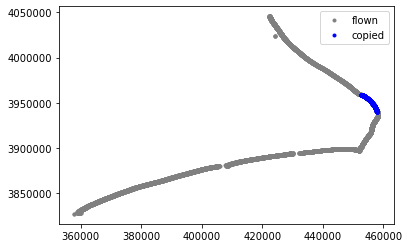

In [2]:
# Make a simple plot
easting = dfa['easting'].values
northing = dfa['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()

In [3]:
s3_resource = boto3.resource('s3')
bucket = s3_resource.Bucket('cmgp-sfm')

# possible locations on S3
s3folders = [\
            '2019-09_OBX/images/jpg/flight1-0912/',\
            '2019-09_OBX/images/jpg/flight2-0912/',\
            '2019-09_OBX/images/jpg/flight3-0913/']

icount = 0
for f in dfs['image_name'].values :
    local_dest = 'D:\\data\\HxDorian_2019\\2019-09-12-13_Pea_Island_jpg\\'+f
    for s3f in s3folders:
        try:
            src_key = s3f+f
            bucket.download_file(src_key, local_dest)
            print("Copied "+local_dest)
            icount = icount +1
        except:
            print("Fail: "+src_key)

            
print("Copied {} files.".format(icount))

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210453-DSC02643-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210453-DSC02643-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210453-DSC02643-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210454-DSC02644-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210454-DSC02644-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210454-DSC02644-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210455-DSC02645-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210455-DSC02645-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210455-DSC02645-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210456-DSC02646-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210456-DSC02646-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210456-DSC02646

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210529-DSC02676-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210529-DSC02676-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210529-DSC02676-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210530-DSC02677-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210530-DSC02677-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210530-DSC02677-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210532-DSC02678-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210532-DSC02678-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210532-DSC02678-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210533-DSC02679-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210533-DSC02679-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210533-DSC02679

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210606-DSC02709-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210606-DSC02709-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210606-DSC02709-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210607-DSC02710-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210607-DSC02710-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210607-DSC02710-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210608-DSC02711-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210608-DSC02711-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210608-DSC02711-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210609-DSC02712-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210609-DSC02712-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210609-DSC02712

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210643-DSC02742-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210643-DSC02742-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210643-DSC02742-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210644-DSC02743-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210644-DSC02743-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210644-DSC02743-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210645-DSC02744-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210645-DSC02744-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210645-DSC02744-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210646-DSC02745-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210646-DSC02745-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210646-DSC02745

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210720-DSC02775-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210720-DSC02775-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210720-DSC02775-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210721-DSC02776-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210721-DSC02776-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210721-DSC02776-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210722-DSC02777-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210722-DSC02777-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210722-DSC02777-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210724-DSC02778-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210724-DSC02778-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210724-DSC02778

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210758-DSC02808-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210758-DSC02808-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210758-DSC02808-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210759-DSC02809-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210759-DSC02809-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210759-DSC02809-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210800-DSC02810-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210800-DSC02810-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210800-DSC02810-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210801-DSC02811-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210801-DSC02811-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210801-DSC02811

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210835-DSC02841-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210835-DSC02841-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210835-DSC02841-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210836-DSC02842-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210836-DSC02842-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210836-DSC02842-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210837-DSC02843-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210837-DSC02843-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210837-DSC02843-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210838-DSC02844-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210838-DSC02844-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210838-DSC02844

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210912-DSC02874-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210912-DSC02874-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210912-DSC02874-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210913-DSC02875-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210913-DSC02875-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210913-DSC02875-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210914-DSC02876-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210914-DSC02876-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210914-DSC02876-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210915-DSC02877-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210915-DSC02877-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210915-DSC02877

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210949-DSC02907-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210949-DSC02907-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210949-DSC02907-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210950-DSC02908-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210950-DSC02908-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210950-DSC02908-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210951-DSC02909-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210951-DSC02909-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210951-DSC02909-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-210952-DSC02910-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-210952-DSC02910-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-210952-DSC02910

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211026-DSC02940-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211026-DSC02940-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211026-DSC02940-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211027-DSC02941-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211027-DSC02941-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211027-DSC02941-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211028-DSC02942-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211028-DSC02942-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211028-DSC02942-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211029-DSC02943-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211029-DSC02943-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211029-DSC02943

Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211105-DSC02973-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211105-DSC02973-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211105-DSC02973-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211106-DSC02974-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211106-DSC02974-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211106-DSC02974-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211107-DSC02975-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211107-DSC02975-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211107-DSC02975-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight1-0912/2019-0912-211108-DSC02976-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-211108-DSC02976-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-211108-DSC02976

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161203-DSC09146-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161204-DSC09147-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161204-DSC09147-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161204-DSC09147-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161205-DSC09148-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161205-DSC09148-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161205-DSC09148-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161206-DSC09149-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161206-DSC09149-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161206-DSC09149-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161208-DSC09150-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161208-DSC09150

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161240-DSC09179-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161241-DSC09180-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161241-DSC09180-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161241-DSC09180-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161242-DSC09181-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161242-DSC09181-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161242-DSC09181-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161244-DSC09182-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161244-DSC09182-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161244-DSC09182-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161245-DSC09183-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161245-DSC09183

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161317-DSC09212-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161318-DSC09213-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161318-DSC09213-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161318-DSC09213-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161319-DSC09214-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161319-DSC09214-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161319-DSC09214-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161320-DSC09215-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161320-DSC09215-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161320-DSC09215-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161321-DSC09216-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161321-DSC09216

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161354-DSC09245-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161355-DSC09246-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161355-DSC09246-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161355-DSC09246-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161356-DSC09247-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161356-DSC09247-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161356-DSC09247-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161357-DSC09248-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161357-DSC09248-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161357-DSC09248-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161358-DSC09249-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161358-DSC09249

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161431-DSC09278-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161432-DSC09279-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161432-DSC09279-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161432-DSC09279-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161433-DSC09280-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161433-DSC09280-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161433-DSC09280-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161434-DSC09281-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161434-DSC09281-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161434-DSC09281-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161435-DSC09282-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161435-DSC09282

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161510-DSC09312-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161511-DSC09313-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161511-DSC09313-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161511-DSC09313-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161512-DSC09314-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161512-DSC09314-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161512-DSC09314-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161513-DSC09315-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161513-DSC09315-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161513-DSC09315-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161514-DSC09316-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161514-DSC09316

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161547-DSC09345-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161548-DSC09346-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161548-DSC09346-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161548-DSC09346-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161550-DSC09347-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161550-DSC09347-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161550-DSC09347-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161551-DSC09348-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161551-DSC09348-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161551-DSC09348-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161552-DSC09349-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161552-DSC09349

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161625-DSC09378-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161626-DSC09379-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161626-DSC09379-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161626-DSC09379-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161627-DSC09380-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161627-DSC09380-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161627-DSC09380-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161628-DSC09381-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161628-DSC09381-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161628-DSC09381-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161629-DSC09382-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161629-DSC09382

Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161703-DSC09411-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161704-DSC09412-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161704-DSC09412-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161704-DSC09412-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161705-DSC09413-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161705-DSC09413-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161705-DSC09413-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161706-DSC09414-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161706-DSC09414-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight3-0913/2019-0912-161706-DSC09414-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-09-12-13_Pea_Island_jpg\2019-0912-161707-DSC09415-N7251F.jpg
Fail: 2019-09_OBX/images/jpg/flight2-0912/2019-0912-161707-DSC09415